In [1]:
import pandas as pd
newpd = pd.DataFrame(columns=['Id', 'Target'])
trainlabels = pd.read_csv('./data/train.csv')
trainlabels.head()

/home/loong/anaconda3/envs/py3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/loong/anaconda3/envs/py3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [2]:
trainlabels.shape[0]

31072

In [ ]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [6]:
for key in label_names.keys():
    trainlabels[label_names[key]] = 0
import numpy as np
newtrainlabels = trainlabels.apply(fill_targets, axis=1)
newtrainlabels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


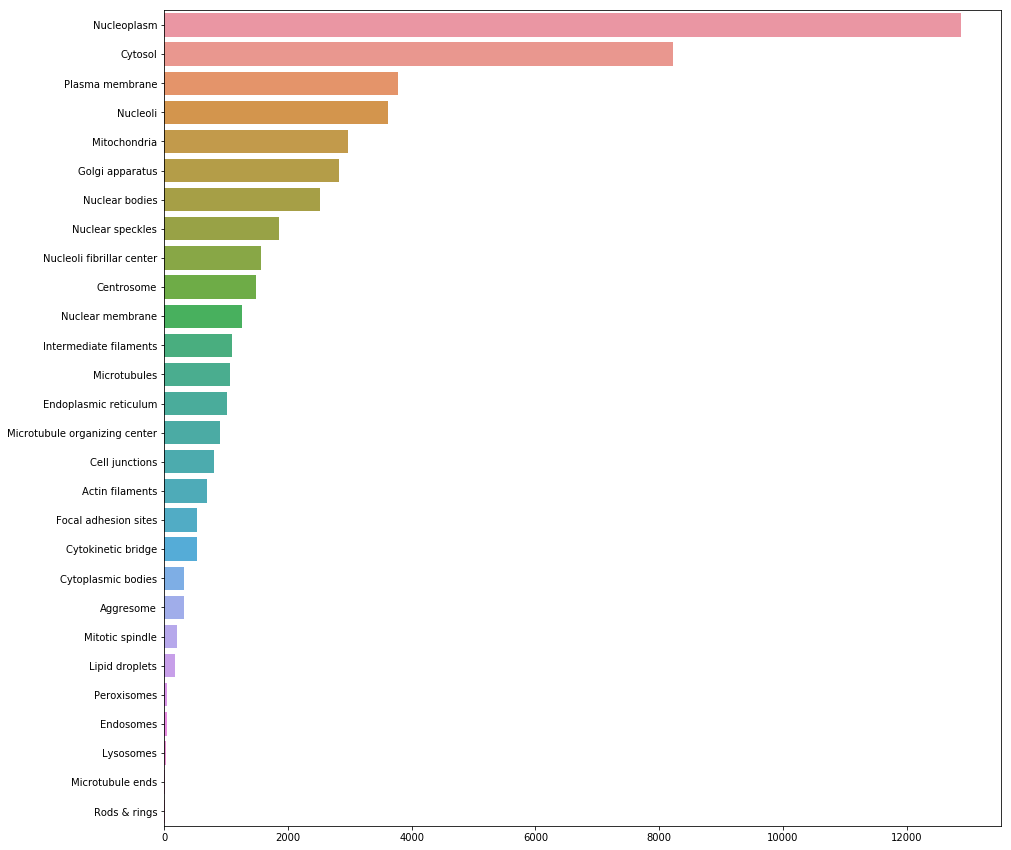

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = newtrainlabels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [9]:
LIST = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']

In [10]:
import os
import shutil
def find_func(LIST):
    if not os.path.exists('./data/new_data'):
        os.makedirs('./data/new_data')
    else: 
        shutil.rmtree('./data/new_data')
        os.makedirs('./data/new_data')
    for find in LIST:
        new_pd = pd.DataFrame(columns=('Id', 'Target'))
        for row in trainlabels.values:
            if find in row[1]:
                new_pd = new_pd.append(pd.DataFrame({'Id':row[0], 'Target':row[1]} ,index=[0]), ignore_index=True)
        new_pd.to_csv('./data/new_data/class_' + find, index=False)
        print('class_' + find + ' DONE!')
        
find_func(LIST)

class_0 DONE!
class_1 DONE!
class_2 DONE!
class_3 DONE!
class_4 DONE!
class_5 DONE!
class_6 DONE!
class_7 DONE!
class_8 DONE!
class_9 DONE!
class_10 DONE!
class_11 DONE!
class_12 DONE!
class_13 DONE!
class_14 DONE!
class_15 DONE!
class_16 DONE!
class_17 DONE!
class_18 DONE!
class_19 DONE!
class_20 DONE!
class_21 DONE!
class_22 DONE!
class_23 DONE!
class_24 DONE!
class_25 DONE!
class_26 DONE!
class_27 DONE!


In [11]:
new_data = pd.DataFrame()
import random

for strs in LIST:
    tmp_pd = pd.read_csv('./data/new_data/class_'+strs)
    length = len(tmp_pd)
    print(length)

13027
10541
17833
5001
3220
10199
1855
3037
955
1527
28
1093
688
537
1066
21
530
210
902
1482
172
3777
802
2965
322
8228
328
11


In [12]:
import math
import numpy as np
for strs in LIST:
    tmp_pd = pd.read_csv('./data/new_data/class_'+strs)
#     print(tmp_pd.head())
    length = len(tmp_pd)
    
    if length > 10000:
        index = math.ceil(length * 0.005)
        index = random.sample(range(length), index)
        pds = tmp_pd.iloc[index]
        new_data = new_data.append(tmp_pd.iloc[index], ignore_index = True)
    elif length <= 10000 and length > 5000:
        index = math.ceil(length * 0.01)
        index = random.sample(range(length), index)
#         print(index)
        new_data = new_data.append(tmp_pd.iloc[index], ignore_index = True)

    elif length <= 5000 and length > 2000:
        index = math.ceil(length * 0.015)
        index = random.sample(range(length), index)
#         print(index)
        new_data = new_data.append(tmp_pd.iloc[index], ignore_index = True)

    elif length <= 2000 and length > 1000:
        index = math.ceil(length * 0.05)
        index = random.sample(range(length), index)
#         print(index)
        new_data = new_data.append(tmp_pd.iloc[index], ignore_index = True)

    elif length <= 1000 and length > 300:
        index = math.ceil(length * 0.1)
        index = random.sample(range(length), index)
#         print(index)
        new_data = new_data.append(tmp_pd.iloc[index], ignore_index = True)

    elif length <= 300 and length > 100:
        index = math.ceil(length * 0.5)
        index = random.sample(range(length), index)
#         print(index)
        new_data = new_data.append(tmp_pd.iloc[index], ignore_index = True)

    elif length <= 100:
        index = length
        index = random.sample(range(length), index)
#         print(index)
        new_data = new_data.append(tmp_pd.iloc[index], ignore_index = True)


In [13]:
new_data.to_csv('./data/new_data.csv', index=False)

In [14]:
train_labels = pd.read_csv('./data/new_data.csv')
train_labels.head()

,Id,Target
0,97bbb41a-bbc4-11e8-b2bc-ac1f6b6435d0,2 0
1,092cb4aa-bbb6-11e8-b2ba-ac1f6b6435d0,5 0
2,bef9f334-bbc4-11e8-b2bc-ac1f6b6435d0,3 0
3,32caca60-bba0-11e8-b2b9-ac1f6b6435d0,7 0
4,5947f362-bbb8-11e8-b2ba-ac1f6b6435d0,0


In [15]:
train_labels.shape[0]

1706

In [16]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0

In [17]:
import numpy as np
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,97bbb41a-bbc4-11e8-b2bc-ac1f6b6435d0,"[2, 0]",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,092cb4aa-bbb6-11e8-b2ba-ac1f6b6435d0,"[5, 0]",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bef9f334-bbc4-11e8-b2bc-ac1f6b6435d0,"[3, 0]",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32caca60-bba0-11e8-b2b9-ac1f6b6435d0,"[7, 0]",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5947f362-bbb8-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


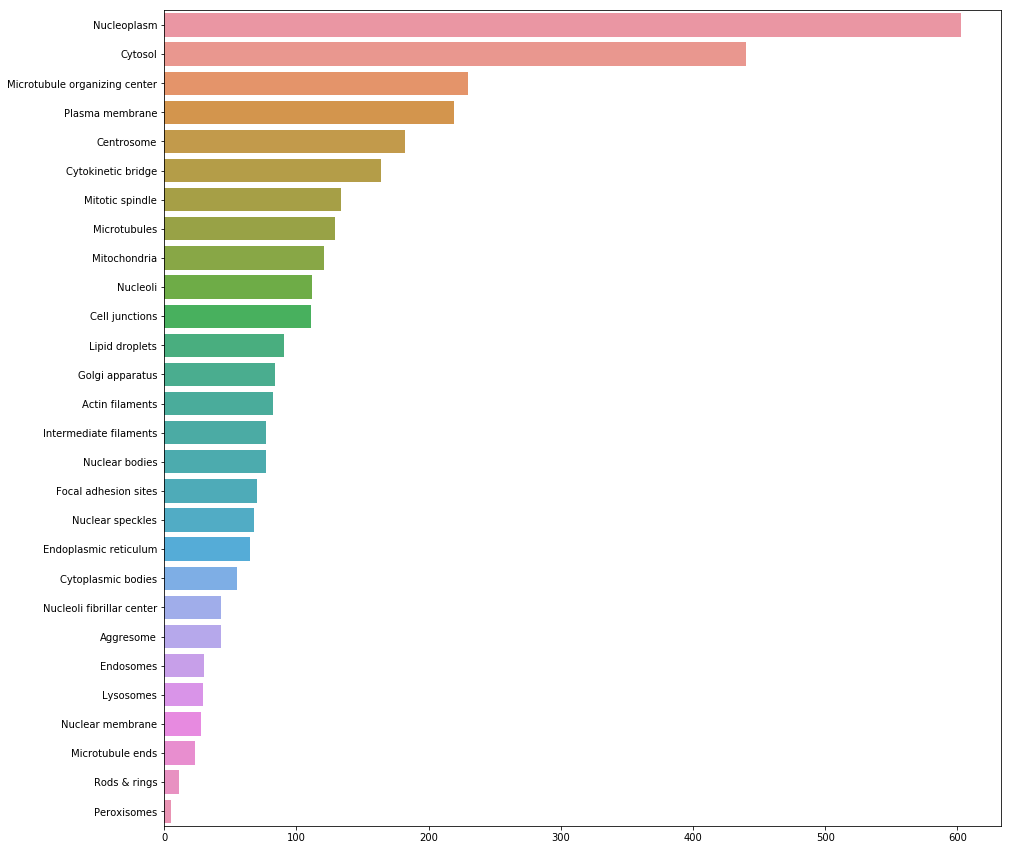

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)